## Importing relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_20newsgroups



## Exploratory data analysis

In [2]:
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
newsgroups_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test',categories=categories,shuffle=True,random_state=42)

In [48]:
newsgroups_train.

array([7, 4, 4, ..., 3, 1, 8], dtype=int64)

In [4]:
print(newsgroups_train.data[1])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



## Understanding basic NLP Techniques 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
#Working with CountVectorizer :
Text=["abra cadabra my friend, you are the brilliant",
      "The boy wo lived friend, the comes to die,",
      "Hello friend, it's a shame i didn't give you the name yet",
     ]
vector=CountVectorizer()
vector.fit(Text)
vector.vocabulary_

{'abra': 0,
 'cadabra': 4,
 'my': 13,
 'friend': 8,
 'you': 20,
 'are': 1,
 'the': 16,
 'brilliant': 3,
 'boy': 2,
 'wo': 18,
 'lived': 12,
 'comes': 5,
 'to': 17,
 'die': 7,
 'hello': 10,
 'it': 11,
 'shame': 15,
 'didn': 6,
 'give': 9,
 'name': 14,
 'yet': 19}

In [7]:
counts=vector.transform(Text)
print(counts)

  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
  (0, 4)	1
  (0, 8)	1
  (0, 13)	1
  (0, 16)	1
  (0, 20)	1
  (1, 2)	1
  (1, 5)	1
  (1, 7)	1
  (1, 8)	1
  (1, 12)	1
  (1, 16)	2
  (1, 17)	1
  (1, 18)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1
  (2, 10)	1
  (2, 11)	1
  (2, 14)	1
  (2, 15)	1
  (2, 16)	1
  (2, 19)	1
  (2, 20)	1


In [8]:
#Demo code to understand TfidfTransformer
from sklearn.feature_extraction.text import TfidfTransformer
#create the transformer
vectorizer=TfidfTransformer()
#the tfidf transformer takes a sparse matrix as input
#which we extract from the CountVectorizer
vectorizer.fit(counts)


TfidfTransformer()

In [9]:
vectorizer.idf_
#ordered by the number of token given to each word

array([1.69314718, 1.69314718, 1.69314718, 1.69314718, 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.        , 1.69314718,
       1.69314718, 1.69314718, 1.69314718, 1.69314718, 1.69314718,
       1.69314718, 1.        , 1.69314718, 1.69314718, 1.69314718,
       1.28768207])

In [11]:
freq=vectorizer.transform(counts)
freq.toarray()

array([[0.39916886, 0.39916886, 0.        , 0.39916886, 0.39916886,
        0.        , 0.        , 0.        , 0.23575556, 0.        ,
        0.        , 0.        , 0.        , 0.39916886, 0.        ,
        0.        , 0.23575556, 0.        , 0.        , 0.        ,
        0.30357821],
       [0.        , 0.        , 0.35934656, 0.        , 0.        ,
        0.35934656, 0.        , 0.35934656, 0.21223587, 0.        ,
        0.        , 0.        , 0.35934656, 0.        , 0.        ,
        0.        , 0.42447173, 0.35934656, 0.35934656, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.34760686, 0.        , 0.20530221, 0.34760686,
        0.34760686, 0.34760686, 0.        , 0.        , 0.34760686,
        0.34760686, 0.20530221, 0.        , 0.        , 0.34760686,
        0.26436398]])

##  Model Building

In [13]:
# importing necessary packages :
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import  make_pipeline

In [14]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())

In [15]:
model.fit(newsgroups_train.data,newsgroups_train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [17]:
#craeting labels for the test data 
labels = model.predict(newsgroups_test.data)

## Testing 

Text(30.453124999999993, 0.5, 'predicted label')

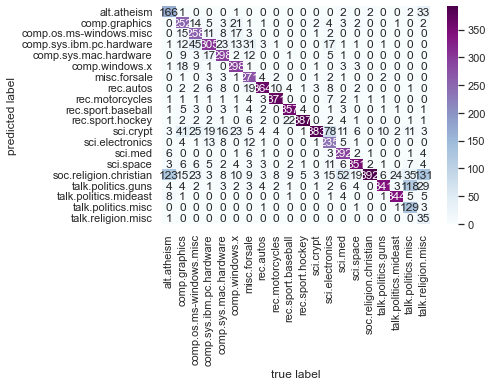

In [61]:
#Confusion matrix heatmap 
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(newsgroups_test.target,labels)
sns.heatmap(mat.T,annot=True,fmt='d',cbar=True,cmap='BuPu',
           xticklabels=newsgroups_train.target_names,
           yticklabels=newsgroups_train.target_names)
#plotting Heatmap of the confusion matrix
plt.xlabel('true label')
plt.ylabel('predicted label')

## Classification report 

In [75]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(newsgroups_test.target,labels))
print(metrics.classification_report(newsgroups_test.target,labels,target_names=newsgroups_test.target_names))

Accuracy: 0.7738980350504514
                          precision    recall  f1-score   support

             alt.atheism       0.80      0.52      0.63       319
           comp.graphics       0.81      0.65      0.72       389
 comp.os.ms-windows.misc       0.82      0.65      0.73       394
comp.sys.ibm.pc.hardware       0.67      0.78      0.72       392
   comp.sys.mac.hardware       0.86      0.77      0.81       385
          comp.windows.x       0.89      0.75      0.82       395
            misc.forsale       0.93      0.69      0.80       390
               rec.autos       0.85      0.92      0.88       396
         rec.motorcycles       0.94      0.93      0.93       398
      rec.sport.baseball       0.92      0.90      0.91       397
        rec.sport.hockey       0.89      0.97      0.93       399
               sci.crypt       0.59      0.97      0.74       396
         sci.electronics       0.84      0.60      0.70       393
                 sci.med       0.92      0.74 

### Comments
we got a precision of 0.77 by using the whole dataset, which could have been higher if we used less categories with less interferences.The higher the precision and recall, the higher the F1-score. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.fo some categories we got a low f1 score, elimanating those would drastically improve the model performance.